<a href="https://colab.research.google.com/github/Talibsid-1996/Ted_Talk_Prediction_Capstone_project2/blob/main/Ted_Talk_Views_Prediction(Individual).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - #**Ted Talk Views Prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Individual



# **Project Summary -**

###TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates.

###A TED talk is a presentation given at a TED (Technology, Entertainment, Design) conference or a TEDx event. TED talks are typically given by experts in various fields, such as science, technology, business, and the arts, and are intended to share ideas and inspire the audience.

###A project summary on TED talk would be a brief overview of the main points and takeaways from a particular TED talk. The summary would cover the speaker's main argument or message, as well as any key insights or examples they shared. It could also include the speaker's background and qualifications, as well as any relevant research or data they cited.



###***Dataset Information***

* Number of instances: 4,005

* Number of attributes: 19






###***Features information***:



* **talk_id**: Talk identification number provided by TED

* **title**: Title of the talk

* **speaker_1**: First speaker in TED's speaker list

* **all_speakers**: Speakers in the talk

* **occupations**: Occupations of the speakers

* **about_speakers**: Blurb about each speaker

* **recorded_date**: Date the talk was recorded

* **published_date**: Date the talk was published to TED.com

* **event**: Event or medium in which the talk was given

* **native_lang**: Language the talk was given in

* **available_lang**: All available languages (lang_code) for a talk

* **comments**: Count of comments

* **duration**: Duration in seconds

* **topics**: Related tags or topics for the talk

* **related_talks**: Related talks (key='talk_id',value='title')

* **url**: URL of the talk

* **description**: Description of the talk

* **transcript**: Full transcript of the talk

###***Target Variable*** :

* **views**: Count of views



# **GitHub Link -**

Provide your GitHub Link here.

https://github.com/Talibsid-1996

# **Problem Statement**


**Write Problem Statement Here.**

* The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/data_ted_talks.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(4005, 19)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()

duplicate_count

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
null_values = df.isnull().sum().reset_index()
null_values

,index,0
0,talk_id,0
1,title,0
2,speaker_1,0
3,all_speakers,4
4,occupations,522
5,about_speakers,503
6,views,0
7,recorded_date,1
8,published_date,0
9,event,0


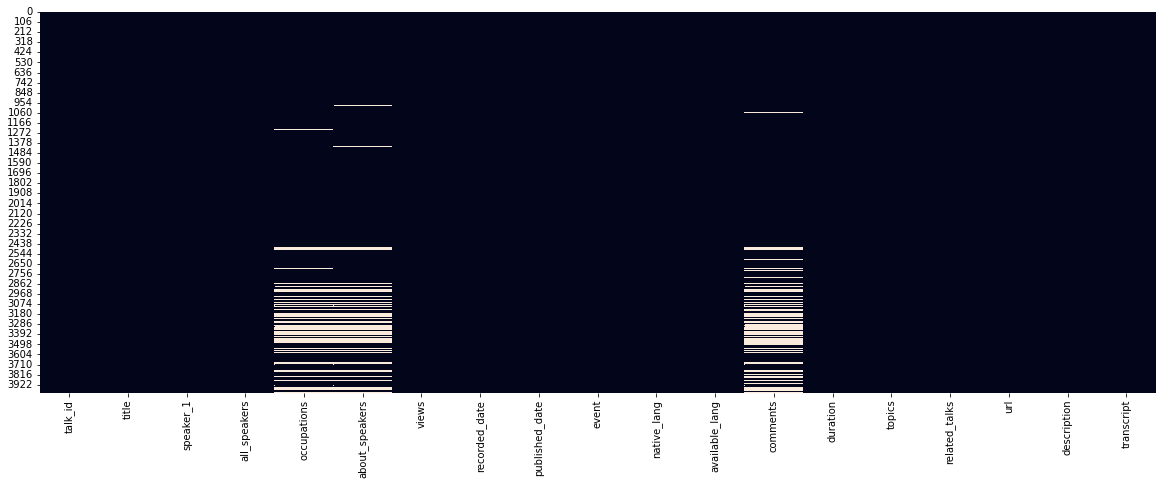

In [ ]:
# Visualizing the missing values
plt.figure(figsize = (20,7))
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

This dataset have rows 4005 and 19 columns with no duplicated values.It has major missing in three columns comments,occupatios and about_speakers.Some missing values are in all_speakers and recorded_date.Dataset have 3 int64 data_type columns ,1 float64 column and 15 object data type columns.It has two date columns also recored date and published which will be useful for our EDA process. 


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(df.columns)

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')


In [ ]:
# Dataset Describe
df.describe()

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


### Variables Description 

As mentioned earlier dataset has 4 int columns.So,we can see the max and min values of columns with 25,50,75 percentile.

We can observe minimum values of views and comments are 0 it means nobody viewed and  commented in some videos.

We can see the counts of all the value.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
unique_values = df.nunique().reset_index()
unique_values

,index,0
0,talk_id,4005
1,title,4005
2,speaker_1,3274
3,all_speakers,3306
4,occupations,2049
5,about_speakers,2977
6,views,3996
7,recorded_date,1334
8,published_date,2962
9,event,459


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# remove null values from occupations,all_apeakers and recorded date
df['occupations'].fillna(str({0: ['Other']}),inplace = True)
df['all_speakers'].fillna('',inplace = True)
df['recorded_date'].fillna('',inplace = True)


In [ ]:
# We can drop this column due to useless data
df['about_speakers'][0]

"{0: 'Nobel Laureate Al Gore focused the world’s attention on the global climate crisis. Now he’s showing us how we’re moving towards real solutions.\\r\\n'}"

In [ ]:
# drop the columns talkid and about_speakers
df.drop(['talk_id','about_speakers'],axis = 1,inplace = True)

# replace the comments with avg of comments
df['comments'].fillna(df['comments'].mean(),inplace =True)

In [ ]:
# Again check the null values
df.isnull().sum().reset_index()


,index,0
0,title,0
1,speaker_1,0
2,all_speakers,0
3,occupations,0
4,views,0
5,recorded_date,0
6,published_date,0
7,event,0
8,native_lang,0
9,available_lang,0


In [ ]:
# change the format of published_date
df['published_date'] = pd.to_datetime(df['published_date'],format='%Y/%m/%d')

# split the published_date in other columns
df['release_day'] = df['published_date'].dt.weekday
df['release_month'] = df['published_date'].dt.month
df['release_year']  =df['published_date'].dt.year

In [ ]:
# Average of views in each year
mean_views = df.groupby('release_year')['views'].mean().nlargest(15).reset_index()
mean_views

,release_year,views
0,2006,4.937003e+06
1,2013,3.012435e+06
2,2015,2.806775e+06
3,2016,2.734725e+06
4,2014,2.423564e+06
5,2012,2.196281e+06
6,2010,2.188767e+06
7,2017,2.160378e+06
8,2009,2.071610e+06
9,2019,1.939608e+06


In [ ]:
# Maximum views year_wise
total_views_yearly = df.groupby('release_year')['views'].sum().nlargest(15).reset_index()
total_views_yearly

,release_year,views
0,2019,1361604924
1,2018,871101863
2,2013,729009369
3,2017,680519097
4,2012,665473046
5,2016,661803437
6,2015,617490537
7,2014,581655293
8,2010,503416439
9,2011,492776405


In [ ]:
# Number of videos release each year
release_counts_yearly = df['release_year'].value_counts().nlargest(15).reset_index()
release_counts_yearly

,index,release_year
0,2019,702
1,2018,477
2,2017,315
3,2012,303
4,2011,255
5,2013,242
6,2016,242
7,2014,240
8,2010,230
9,2015,220


In [ ]:
# create categorical columns for more insights
weekday = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df['release_day']  = df['release_day'].map(weekday)

### What all manipulations have you done and insights you found?

Inference:-

1.First of all we removed all the null values.

2.Drop all the unwanted columns.

3.Explored the published date columns beacuse it has so much insights.

4.In 2006 have most average views following 2013 and 2015.Year 2020 has the least average views.

5.In the year 2019 has the max views in ted talk history after that 2018 nad 2013. Year 2020 is the least beacuse wen dont have enough data of 2020.

6.In the year 2019 has maximum release videos following 2018 and 2017.
Year 2006 has the least release thats why it has maximum average.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

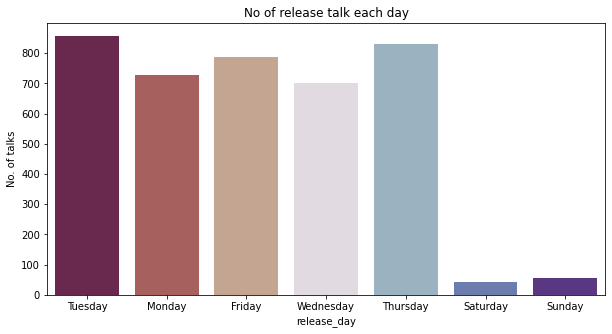

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize = (10,5))
sns.countplot(data = df,x = 'release_day',palette='twilight_shifted_r')
plt.ylabel('No. of talks')
plt.title('No of release talk each day')
plt.show()

##### 1. Why did you pick the specific chart?

I picked countplot from seaborn library beacuse it has ability to the show count of all the data in a bar chart. 




##### 2. What is/are the insight(s) found from the chart?

Inference:-

1.I found count of released videos in week days.

2.Most videos released on Tuesday,Thursday and Friday.

3.Saturday and Sunday has the least count.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This insight can help in business like:-

Ted talk should increase the release count on saturday and sunday also.

There is no negative growth in business.

#### Chart - 2

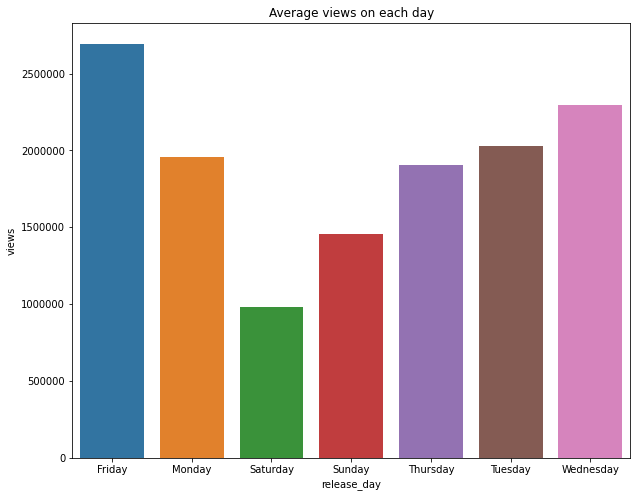

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize = (10,8))
plt.ticklabel_format(style='plain')
avg_views = df.groupby('release_day')['views'].mean().reset_index()
sns.barplot(x='release_day',y='views' ,data =avg_views )
plt.title('Average views on each day')
plt.show()

##### 1. Why did you pick the specific chart?

I picked barplot from seaborn library beacause it can easily show the average views in each day.

##### 2. What is/are the insight(s) found from the chart?

Inference:- 

1.Friday has the most number of average views due to weekend.

2.Tuesday has maximum release count still it has on 3rd position after Wednesday.

3.Saturday & Sunday have least release therefore it has least average views.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

1.Same as above ,Ted talk should increase the release count on weekend so people can watch it on weekend also.

2.As compared to number of counts and avg views, people love to watch videos on wekeends.

In [ ]:
# create categorical columns for more insights
number = [1,2,3,4,5,6,7,8,9,10,11,12] 
name = ['January','February','March','April','May','June','July','August','September','October','November','December']
df['release_month'] = df['release_month'].replace(number,name)

#### Chart - 3

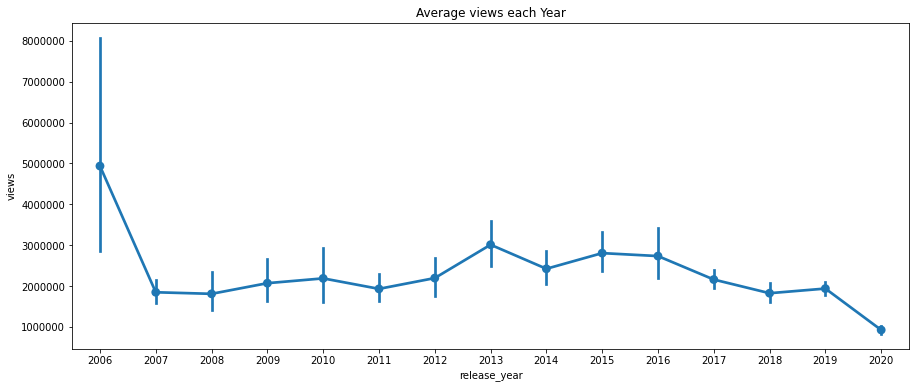

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(15,6))
plt.ticklabel_format(style='plain')
sns.pointplot(x= 'release_year', y= 'views', data=df)
plt.title('Average views each Year')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

I picked point plot from seaborn beacause it has the ability to show mean of a numeric variable for different levels of a categorical variable. 


##### 2. What is/are the insight(s) found from the chart?

Answer Here

1.In 2006 have most number average views following 2013 and 2015.

2.Year 2020 has the least average views.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

If we talk about the business mean views are on same scale from 2007 to 2019.In 2013 we cans see the little bit change.

Somwhere the it is going down beacause of number of release videos.

#### Chart - 4

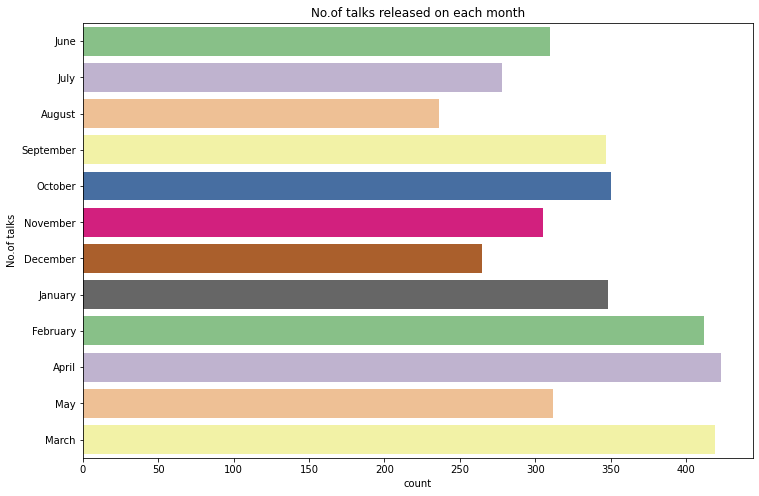

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize = (12,8))
sns.countplot(data = df ,y='release_month',palette ='Accent' )
plt.ylabel('No.of talks')
plt.title('No.of talks released on each month')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

I picked countplot from seaborn library beacuse it gives us the number of talks release  in each month.

I tried to show it with horizontal bar chart.  

##### 2. What is/are the insight(s) found from the chart?

Inference:-

1.April has the most number of release count following February and March.

2.August and December has the least number of release.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Ted_talk should increase the release count in August and decmber also.

We dont have enough information, why they have less number of release in these two months.

#### Chart - 5

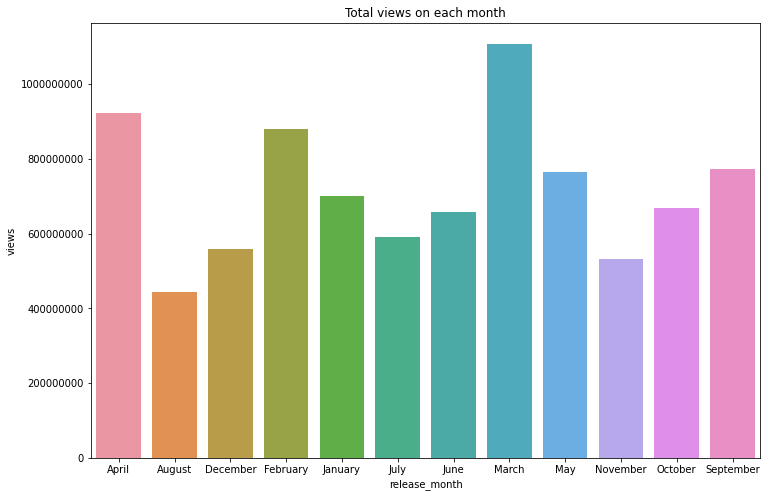

In [ ]:
# Chart - 5 visualization code
month_views = df.groupby('release_month')['views'].sum().reset_index() 
plt.figure(figsize = (12,8))
plt.ticklabel_format(style='plain')
sns.barplot(x='release_month' , y= 'views' ,data = month_views)
plt.title('Total views on each month')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

i picked barplot for getting the total views with respect to month.

##### 2. What is/are the insight(s) found from the chart?

Inference:-

1.March has the most views and it has also the large number of released talks.

2.August has the least number of released therfore it has less number of total views.

3.March has the less number of release talk still it is giving better result in total views. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Ted talk should do some survey about march have large numer of viewership.

if they increase the number of count in each month automatically viewership will increase.

#### Chart - 6

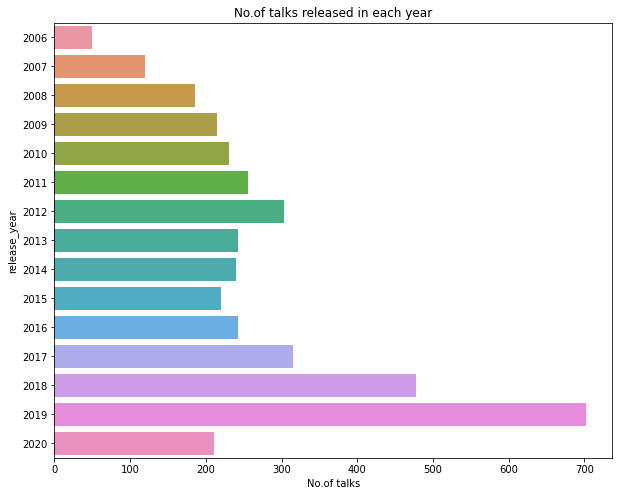

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize = (10,8))
sns.countplot(data = df , y= 'release_year',)
plt.xlabel('No.of talks')
plt.title('No.of talks released in each year')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

The countplot in the seaborn library is used to create a count plot, which is a type of chart that displays the count of observations for each category of a categorical variable.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Inference:-

1.In the year 2019 Ted talk has maximum release videos following 2018 and 2017.

2.In 2006 it has least talks therefore 2006 has largerst mean in views.

3.Talks are rapidly increasing from 2017.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

We can see rapid change in 2012.

Why release count decreased suddenly in 2012,ted talk should think about it. 

#### Chart - 7

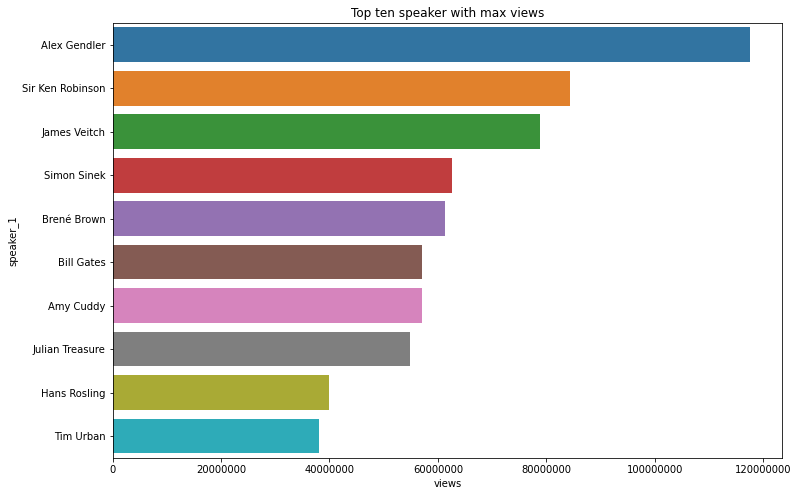

In [ ]:
# Chart - 7 visualization code
total_views = df.groupby('speaker_1')['views'].sum().nlargest(10).reset_index()
plt.figure(figsize = (12,8))
plt.ticklabel_format(style='plain')
sns.barplot(x='views' , y= 'speaker_1' ,data = total_views)
plt.title('Top ten speaker with max views')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

I picked barplot from seaborn because it displays the sum of a numeric variable for different levels of a categorical variable.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Inference:- 

1.We have lots of speaker in ted talk so i filter out top 10 speakers.

2.Alex Gendler has most views in ted talk history.We can say that he influenced a lot.Sir kin Robinson and JAmes weitch are following Alex Gendler

3.Bill gates is also in this list.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Ted talk should invite other speaker also again and again who have larger number of viewership.

After Alec Gendler other speaker dont have maximum released still they have larger viewrship.So,Ted talk should call them again ,most popular speaker. 

#### Chart - 8

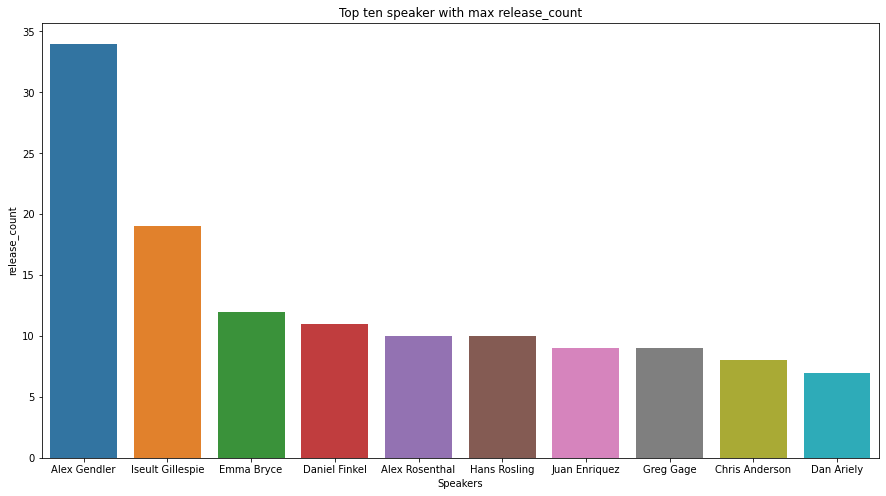

In [ ]:
# Chart - 8 visualization code
speaker_count  = df['speaker_1'].value_counts().reset_index().head(10)
plt.figure(figsize = (15,8))
plt.ticklabel_format(style='plain')
sns.barplot(x='index' , y= 'speaker_1' ,data = speaker_count)
plt.xlabel('Speakers')
plt.ylabel('release_count')
plt.title('Top ten speaker with max release_count')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

I picked barplot from seaborn because it displays the count of a numeric variable for different levels of a categorical variable.

##### 2. What is/are the insight(s) found from the chart?

Inference:-

1:-Alex Gendler has maximum release in ted talk history therefore he has max views as we explored earlier.

2:Iseult Gillespie and Emma Bryce are runner up in max release count list.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Ted talk should release the talk of other speakers also.As we can see the major difference between first and second person in release counts with repect to speakers.

#### Chart - 9

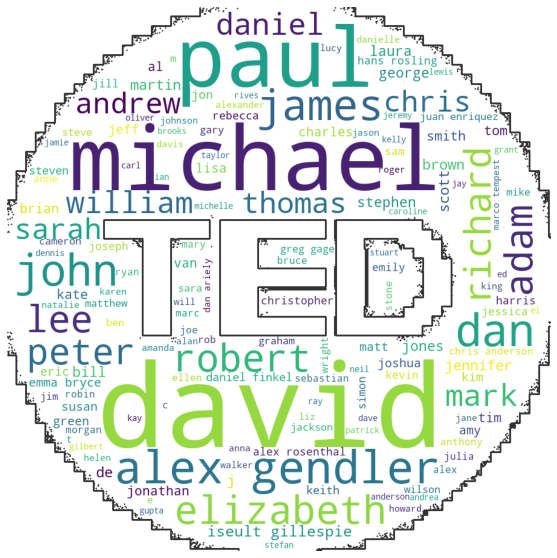

In [ ]:
# Chart - 9 visualization code
corpus = list(df['speaker_1'].values)
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import numpy as npy
from PIL import Image
import requests
import io
response = requests.get("https://i2.wp.com/norfolkpl.org/wp-content/uploads/2019/01/ted-talk-logo.jpg?ssl=1")
image_bytes = io.BytesIO(response. content)
dataset = " ".join(corpus)
def create_word_cloud(string):

    maskArray = npy.array(Image.open(image_bytes))
    cloud = WordCloud(background_color = "white", max_words = 150, mask = maskArray, stopwords = set(STOPWORDS),contour_width = 3, contour_color='#333')
    cloud.generate(string)
#     cloud.to_file("wordCloud.png")
    return cloud
dataset = dataset.lower()
wordcloud=create_word_cloud(dataset)
plt.figure(figsize=[20,10])
plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

A word cloud is a visual representation of the most frequent words in a text, where the size of each word is proportional to its frequency. In Python, you can create a word cloud using the wordcloud library.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

1.We can easily see the most frequent name in speaker list with this amazing visuals.

2.Micheal ,David and Paul are most frequent words.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In wordcloud we can easily see the frequent word without using any funtion.

#### Chart - 10

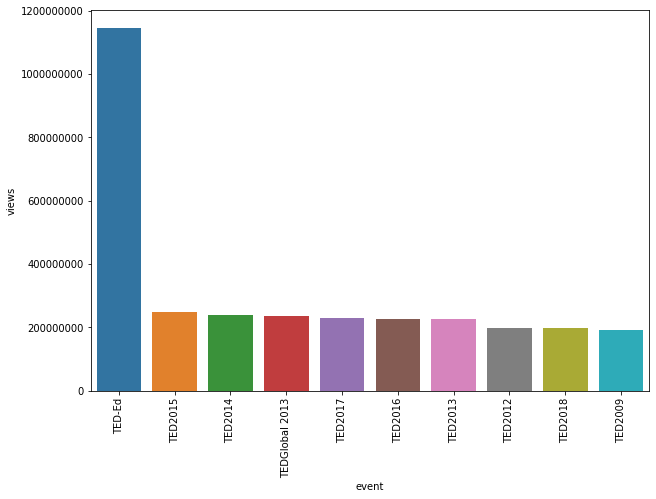

In [ ]:
# Chart - 10 visualization code
event_views = df.groupby('event')['views'].sum().nlargest(10).reset_index()
plt.figure(figsize = (10,7))
plt.ticklabel_format(style='plain')
plt.xticks(rotation  =90)
sns.barplot(data =event_views,x= 'event',y= 'views' )

##### 1. Why did you pick the specific chart?

Answer Here.

I picked barplot from seaborn because it displays the count of a numeric variable for different levels of a categorical variable.

##### 2. What is/are the insight(s) found from the chart?

Inference:-

1:- TED-Ed has maximum views following TED2015 and TED2014.

2.In Top 10 list only TED-Ed has the very large number than we can see a rapid change in views .

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In ted talk only TED_Ed has the maximum views so,Ted talk should organise other events also.


They should understand that how they organise TED-Ed event.

#### Chart - 11

Text(0.5, 1.0, 'Toatl views VS release_year')

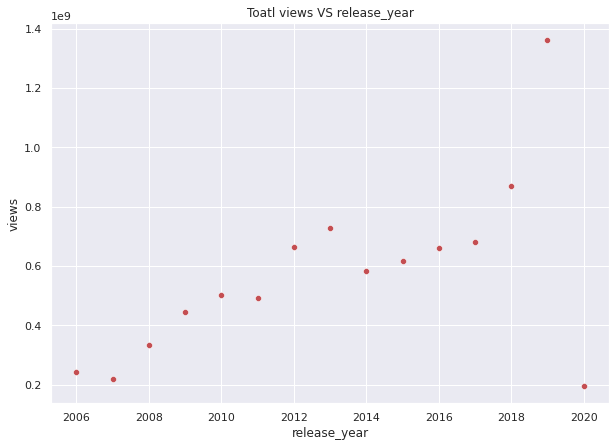

In [ ]:
# Chart - 11 visualization code
total_viewrship  =df.groupby('release_year')['views'].sum().reset_index()
plt.figure(figsize = (10,7))

sns.set(style='darkgrid')
sns.scatterplot(x="release_year",y="views",data=total_viewrship,color = 'r')
plt.title('Toatl views VS release_year')

##### 1. Why did you pick the specific chart?

Answer Here.

Scatter plot tells us how two variable related to each other therfore i used this.


##### 2. What is/are the insight(s) found from the chart?

Infernce:- 

1.In scatter plot we can see that as soon as year increasing the sum of views increasing.

2.Year 2019 has the maximum views and 2006 has less number of views due to less number of release.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In this chart we can easily find that ted talk veiwership increasing which will be helpful for ted talk business.

They should take the same steps which the took in year 2019.

#### Chart - 12

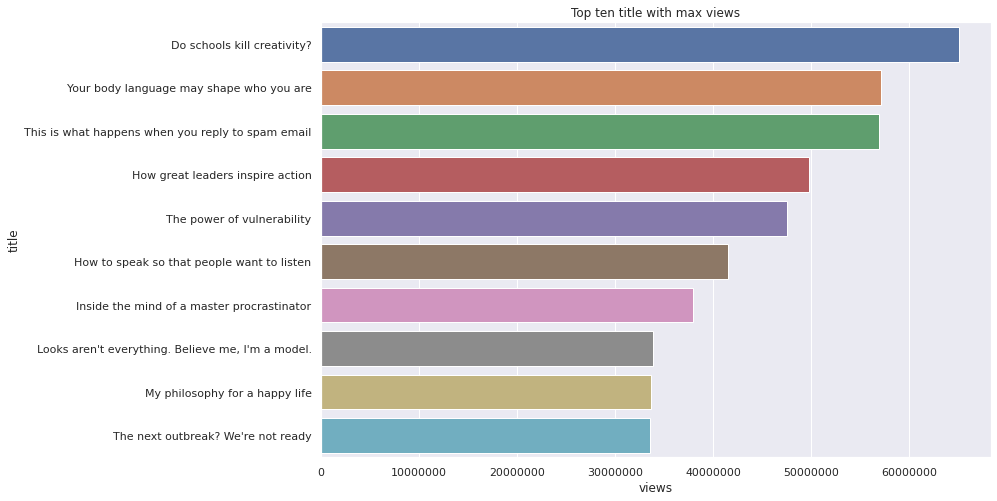

In [ ]:
# Chart - 12 visualization code
total_comments = df.groupby('title')['views'].sum().nlargest(10).reset_index()
plt.figure(figsize = (12,8))
plt.ticklabel_format(style='plain')
sns.barplot(x='views' , y= 'title' ,data = total_comments)
plt.title('Top ten title with max views')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

I picked a simple bar char for a categorical variable and continuous variable.

In [ ]:
total_comments

,title,views
0,Do schools kill creativity?,65051954
1,Your body language may shape who you are,57074270
2,This is what happens when you reply to spam email,56932551
3,How great leaders inspire action,49730580
4,The power of vulnerability,47544833
5,How to speak so that people want to listen,41504331
6,Inside the mind of a master procrastinator,37976820
7,"Looks aren't everything. Believe me, I'm a model.",33874546
8,My philosophy for a happy life,33691484
9,The next outbreak? We're not ready,33521780


##### 2. What is/are the insight(s) found from the chart?

Inference:-

1.**Do school kills creativity?** is topic people liked the most.

2.**Your body language may shape who you are' and 'This is what happens when you reply to spam email'** are the topic people liked the most.	

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Ted talk should focus on these type of topics for more business.

These are the most effective topics.

#### Chart - 13

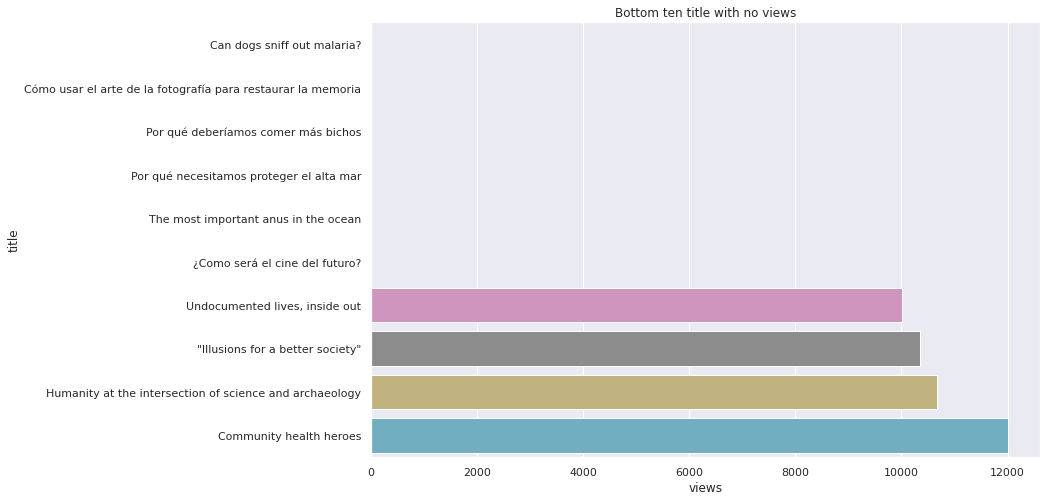

In [ ]:
# Chart - 13 visualization code
less_effective_title = df.groupby('title')['views'].sum().nsmallest(10).reset_index()
plt.figure(figsize = (12,8))
plt.ticklabel_format(style='plain')
sns.barplot(x='views' , y= 'title' ,data = less_effective_title)
plt.title('Bottom ten title with no views')
plt.show()

In [ ]:
less_effective_title

,title,views
0,Can dogs sniff out malaria?,0
1,Cómo usar el arte de la fotografía para restau...,0
2,Por qué deberíamos comer más bichos,0
3,Por qué necesitamos proteger el alta mar,0
4,The most important anus in the ocean,0
5,¿Como será el cine del futuro?,0
6,"Undocumented lives, inside out",10004
7,"""Illusions for a better society""",10356
8,Humanity at the intersection of science and ar...,10680
9,Community health heroes,12017


##### 1. Why did you pick the specific chart?

Answer Here.

I picked a simple bar char for a categorical variable and continuous variable.

##### 2. What is/are the insight(s) found from the chart?

Infrence:-

1.These are the least effective topic in ted talk history.

2.We found moslty are of non english language it means english language is most effcetive.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

For increasing the business of ted talk they should focus of non-english content because it is less effective.

#### Chart - 14 - Correlation Heatmap

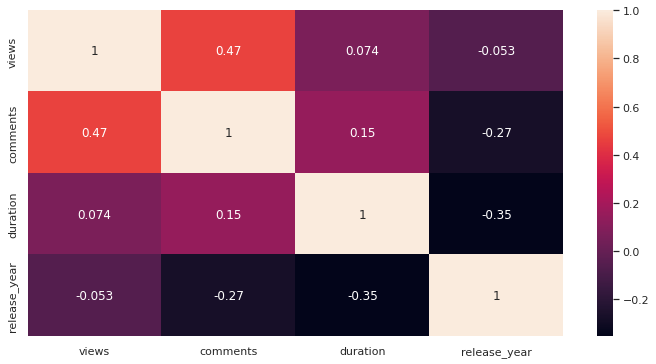

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(12,6))
sns.heatmap(df.corr() , annot = True)

##### 1. Why did you pick the specific chart?

Answer Here.

I picked heatmap() which used to the correlation between all features in matrix format.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

1.Comments and views are highly correlated to each other. It means one variable will increase another also increase.

#### Chart - 15 - Pair Plot 

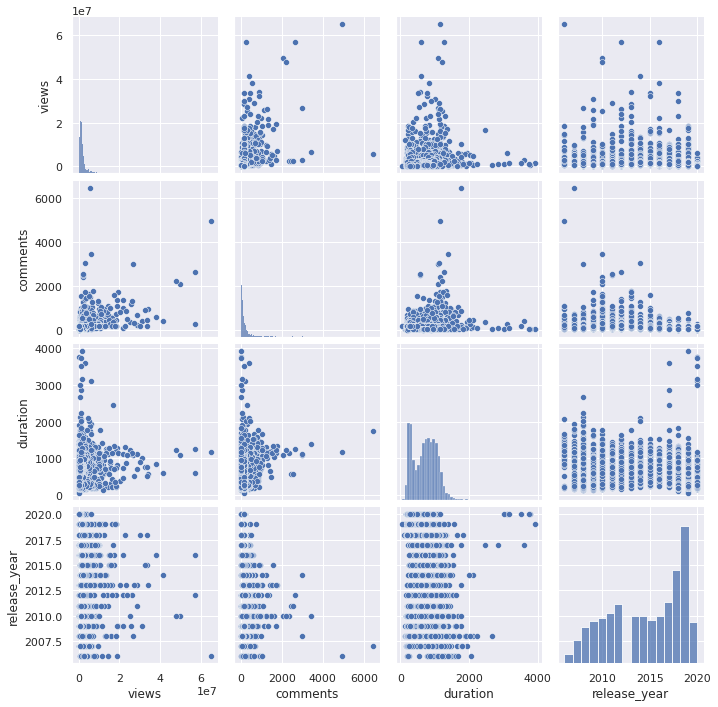

In [ ]:
# Pair Plot visualization code
sns.pairplot(df)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Pairplot is a function in the seaborn library in Python that is used to create a matrix of scatter plots to visualize the relationship between multiple variables in a dataset.

##### 2. What is/are the insight(s) found from the chart?

Inference:-

1.We can see the how data is scattered to each other.

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum().reset_index()

,index,0
0,title,0
1,speaker_1,0
2,all_speakers,0
3,occupations,0
4,views,0
5,recorded_date,0
6,published_date,0
7,event,0
8,native_lang,0
9,available_lang,0


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

1.We have already get rid of missing values in EDA part.


2.We had missing values in five columns.


3.Columns which have less than 5 missing values we replaced with most frequent values.

4.In some columns we used fillna forumula.

5.In numerical colums we replaced missing values with mean of column.

6.These are some ways which i used in removing null values.

### 2. Feature Manipulation

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# create a new feature average views by speaker
mean_encoding = df.groupby('speaker_1')['views'].mean().to_dict()
df['avg_views_by_speaker'] = df['speaker_1'].map(mean_encoding)

In [ ]:
df['occupations'] = df.apply(lambda row: eval(row['occupations']), axis=1)
for index, row in df.iterrows():
    occup_list=list(row['occupations'].values())[0][0]
    df.loc[index,'occupation'] = str(occup_list)


In [ ]:
# create a new feature average views by events
mean_encoding_event = df.groupby('event')['views'].mean().to_dict()
df['avg_views_by_event'] = df['event'].map(mean_encoding_event)

# creating new features total language
df['total_lang'] = df.apply(lambda x: len(x['available_lang']), axis=1)

# creating new features number of topics
df['no_of_topics'] = df.apply(lambda x: len(x['topics']), axis=1)

# creating new features age of video
df['video_age'] = 2022 - df['release_year']

In [ ]:
# Select your features wisely to avoid overfitting
# check all the columns
df.columns

Index(['title', 'speaker_1', 'all_speakers', 'occupations', 'views',
       'recorded_date', 'published_date', 'event', 'native_lang',
       'available_lang', 'comments', 'duration', 'topics', 'related_talks',
       'url', 'description', 'transcript', 'release_day', 'release_month',
       'release_year', 'avg_views_by_speaker', 'occupation',
       'avg_views_by_event', 'total_lang', 'no_of_topics', 'video_age'],
      dtype='object')

In [ ]:
# Drop all unwanted columns
df.drop(columns = ['title','all_speakers','recorded_date','release_year','topics','available_lang','event','speaker_1','url','transcript','description','native_lang','occupations','occupation','published_date','related_talks'],inplace = True,axis = 1)



In [ ]:
# remaing columns
df.head()

,views,comments,duration,release_day,release_month,avg_views_by_speaker,avg_views_by_event,total_lang,no_of_topics,video_age
0,3523392,272.0,977,Tuesday,June,2.190599e+06,3.876291e+06,270,134,16
1,14501685,628.0,1190,Tuesday,June,3.987156e+06,3.876291e+06,303,138,16
2,1920832,124.0,1286,Tuesday,June,2.156190e+06,3.876291e+06,165,123,16
3,2664069,219.0,1116,Tuesday,June,1.979411e+06,3.876291e+06,219,116,16
4,65051954,4931.0,1164,Tuesday,June,2.812684e+07,3.876291e+06,387,84,16


##### What all feature selection methods have you used  and why?

Answer Here:-

1.We just create some features by normal python function.

2.Drop some unwanted features.

3.**We will do some features selection after removing of outliers.**

### 3. Handling Outliers

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   views                 4005 non-null   int64  
 1   comments              4005 non-null   float64
 2   duration              4005 non-null   int64  
 3   release_day           4005 non-null   object 
 4   release_month         4005 non-null   object 
 5   avg_views_by_speaker  4005 non-null   float64
 6   avg_views_by_event    4005 non-null   float64
 7   total_lang            4005 non-null   int64  
 8   no_of_topics          4005 non-null   int64  
 9   video_age             4005 non-null   int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 313.0+ KB


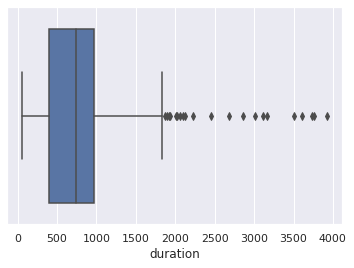

In [ ]:
sns.boxplot(data = df,x='duration')

In [ ]:
# Handling Outliers & Outlier treatments
# We have some outliers in each features
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outlier1  = Q1 - 1.5*IQR
outlier2  = Q3 + 1.5*IQR

((df < outlier1) | (df > outlier2)).sum()


<ipython-input-49-7c898ebc4497>:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df < outlier1) | (df > outlier2)).sum()


avg_views_by_event      156
avg_views_by_speaker    373
comments                361
duration                 21
no_of_topics            143
release_day               0
release_month             0
total_lang              143
video_age                 0
views                   393
dtype: int64

In [ ]:
# replace outliers with 25percentile and 75percentile
for i in ['avg_views_by_event','avg_views_by_speaker','comments','duration','no_of_topics','total_lang','views']:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75) 
  IQR = Q3 - Q1
  df[i] = np.where(df[i] < (Q1 - 1.5*IQR),(Q1 - 1.5*IQR),np.where(df[i] > (Q3 + 1.5*IQR) ,(Q3 + 1.5*IQR),df[i]))

In [ ]:
# Removed the outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outlier1  = Q1 - 1.5*IQR
outlier2  = Q3 + 1.5*IQR

((df < outlier1) | (df > outlier2)).sum()

<ipython-input-51-42098d5f5fba>:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df < outlier1) | (df > outlier2)).sum()


avg_views_by_event      0
avg_views_by_speaker    0
comments                0
duration                0
no_of_topics            0
release_day             0
release_month           0
total_lang              0
video_age               0
views                   0
dtype: int64

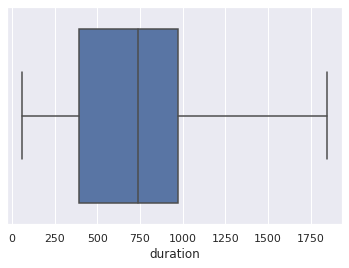

In [ ]:
# outliers removed from duration columns
sns.boxplot(data = df,x='duration')

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

Box plot is one of best method of finding the outliers in a particular features.

The outliers which are less than 25 percentile ,we replaced it with 25 percentile value.

The outliers which are more than 75 percentile ,we replaced it with 25 percentile value.

### 4. Categorical Encoding

In [ ]:
# separating dependent and independent variable

x = df.drop(columns = 'views')
y = df['views']

In [ ]:
# Encode your categorical columns
x = pd.get_dummies(x)
x.head(2)

,comments,duration,avg_views_by_speaker,avg_views_by_event,total_lang,no_of_topics,video_age,release_day_Friday,release_day_Monday,release_day_Saturday,...,release_month_December,release_month_February,release_month_January,release_month_July,release_month_June,release_month_March,release_month_May,release_month_November,release_month_October,release_month_September
0,272.0,977.0,2190599.25,3.778944e+06,270.0,134.0,16,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,336.0,1190.0,3987156.10,3.778944e+06,294.0,138.0,16,0,0,0,...,0,0,0,0,1,0,0,0,0,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

1.pd.get_dummies() is a function in the pandas library in Python that is used to convert categorical variables into dummy/indicator variables. This process is also known as **one-hot encoding**.

2.In One-hot encoding, a categorical variable is transformed into a binary matrix where each column represents a category and each row represents an observation. Each cell in the matrix is filled with a binary value of 1 or 0 indicating the presence or absence of a particular category in that observation.

### 5. Feature  Selection






#### 1. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
# Import the library use in feature selection

from sklearn.feature_selection import f_regression
f_scores = f_regression(x,y)
f_scores[1]

array([9.90841321e-159, 1.75975910e-009, 0.00000000e+000, 1.13785436e-127,
       5.81214882e-185, 4.71158966e-002, 3.94142602e-001, 2.51061953e-012,
       1.43491232e-001, 3.85368618e-005, 2.73265521e-004, 3.98310726e-002,
       2.13786984e-001, 9.42649939e-001, 3.53875418e-002, 4.66867525e-001,
       7.41463988e-002, 3.39945041e-001, 5.74106856e-002, 2.06942978e-001,
       4.02649944e-001, 5.32863676e-004, 6.73443607e-002, 7.15013746e-002,
       9.72823723e-003, 2.07117470e-001])

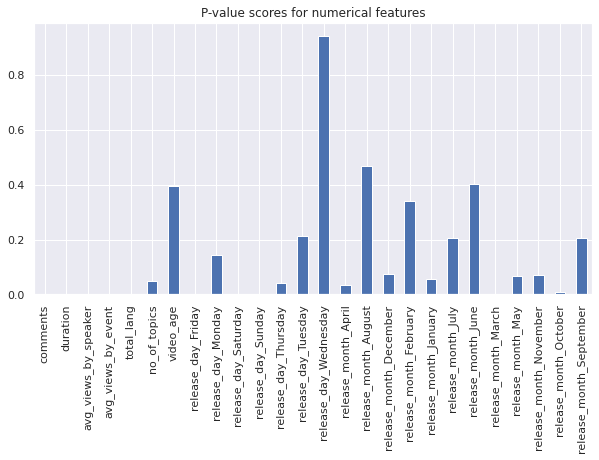

In [ ]:
# find the p_values
p_values = pd.Series(f_scores[1],index = x.columns )
plt.figure(figsize = (10,5))
p_values.plot(kind = 'bar')
plt.title('P-value scores for numerical features')
plt.show()

In [ ]:
# selectng p_value less than 0.005
selected_features = np.where(p_values<0.005)[0]
x = x.iloc[0: , selected_features]

In [ ]:
# Getting VIF for best feature selection
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x):

  vif = pd.DataFrame()
  vif['variables'] = x.columns
  vif['VIF'] = [variance_inflation_factor(x.values ,i) for i in range(x.shape[1])]

  return(vif)

In [ ]:
calc_vif(x)

,variables,VIF
0,comments,3.912068
1,duration,4.136869
2,avg_views_by_speaker,4.621960
3,avg_views_by_event,9.040717
4,total_lang,10.769324
5,release_day_Friday,1.278824
6,release_day_Saturday,1.022116
7,release_day_Sunday,1.031887
8,release_month_March,1.124586


In [ ]:
# Removing total_lang due to high multicollinearity
x.drop('total_lang' , axis = 1 , inplace = True)

In [ ]:
calc_vif(x)

,variables,VIF
0,comments,3.434986
1,duration,4.008254
2,avg_views_by_speaker,4.381047
3,avg_views_by_event,6.079637
4,release_day_Friday,1.262692
5,release_day_Saturday,1.019789
6,release_day_Sunday,1.030452
7,release_month_March,1.124260






##### What all feature selection methods have you used  and why?

Answer Here.

**Feature_selection**:-The function returns the F-value and p-value of the linear regression test for each feature in the dataset, which can be used to select the features with the highest F-value and lowest p-value.

**VIF**:-The Variance Inflation Factor (VIF) is a statistical measure used to assess the degree of multicollinearity in a multiple regression model. Multicollinearity occurs when there is a high correlation between independent variables (also called predictor variables or features) in a regression model.



In [ ]:
print(x.columns)

Index(['comments', 'duration', 'avg_views_by_speaker', 'avg_views_by_event',
       'release_day_Friday', 'release_day_Saturday', 'release_day_Sunday',
       'release_month_March'],
      dtype='object')





##### Which all features you found important and why?

Answer Here.

These are some features which we can use in creating a model.We removed multicollinear features and  with feature_selection we found P-value.

### 6. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3 ,random_state=123 )

In [ ]:
# size of train data
x_train.shape

(2803, 8)

In [ ]:
# size of test data
x_test.shape

(1202, 8)

##### What data splitting ratio have you used and why? 

Answer Here.

I took **30%** of data as test data because it will be helpful for creating a best mode.If your dataset is small, you may want to use a larger test size to ensure that the test set is representative of the overall population.

## ***6. ML Model Implementation***

### ML Model -  Linear Regression Model









In [ ]:
# ML Model - 1 Implementation
reg = LinearRegression().fit(x_train,y_train)

# Fit the Algorithm
reg.fit(x_train,y_train)

# Predict on the model
y_pred = reg.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric 


In [ ]:
# Visualizing evaluation Metric Score chart
Linear_MAE = mean_absolute_error(y_test,y_pred)
print("MAE :" ,Linear_MAE)
Linear_MSE = mean_squared_error(y_test,y_pred)
print("MSE :" ,Linear_MSE)
Linear_RMSE = np.sqrt(Linear_MSE)
print("RMSE :" ,Linear_RMSE) 
Linear_r2 = r2_score(y_test,y_pred)
print("r2 :" ,Linear_r2)

# Adjusted R-squared formula = 1 - ( (1-R^2) * (n-1) / (n-p-1) )
Linear_adjusted_r2 = 1-(1-r2_score((y_test), (y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted_r2 :" ,Linear_adjusted_r2)

MAE : 260752.21899696472
MSE : 234841173869.58383
RMSE : 484604.1414077926
r2 : 0.7959370600323038
Adjusted_r2 : 0.7945686580878432


In [ ]:
Linear_Dataframe = pd.DataFrame(zip(y_test, y_pred), columns = ['actual', 'pred'])
Linear_Dataframe

,actual,pred
0,1559970.0,1.526645e+06
1,1524453.0,1.384209e+06
2,779329.0,7.369715e+05
3,4004739.0,2.504141e+06
4,4000351.0,3.640626e+06
...,...,...
1197,1146861.0,1.012874e+06
1198,4009671.5,3.787180e+06
1199,1601998.0,1.510542e+06
1200,1724019.0,1.820843e+06


Answer:

1.The first model we used is Linear Regression.

2.Fit the algorithm and predict it.

The evaluation metrics we used are:-

1.**Mean absolute Error**:-It is calculated as the average of the absolute differences between the predicted values and the true values

2.**Mean Squared Error**:-It is calculated as the average of the squared differences between the predicted values and the true values. 

3.**Root Mean Squared Error**:It is calculated as the average of the root of squared differences between the predicted values and the true values. 

4.**R2 score**:It represents the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

5.**Adjusted r2**:It is a better metric to use when comparing models with different numbers of independent variables because it penalizes models for adding unnecessary independent variables.

#### 2. Cross- Validation & Hyperparameter Tuning

**Lasso Regularization**


In [ ]:
# Import  lasso regularization and gridsearchCV

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
lasso = Lasso()
parameters = {'alpha' : [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,110,120,150,160,170,200]}

# Fit the Algorithm
lasso_regressor = GridSearchCV(lasso, parameters,scoring='neg_mean_squared_error' ,cv = 5)
lasso_regressor.fit(x_train, y_train)

# Use lasso
lasso = Lasso(alpha = 200, max_iter =  3000)
lasso.fit(x_train,y_train) 

In [ ]:
# Predict on the model
y_pred_lasso = lasso_regressor.predict(x_test)
lasso_MAE = mean_absolute_error(y_test,y_pred_lasso)
print("MAE :" ,lasso_MAE)
lasso_MSE = mean_squared_error(y_test,y_pred_lasso)
print("MSE :" ,lasso_MSE)
lasso_RMSE = np.sqrt(lasso_MSE)
print("RMSE :" ,lasso_RMSE) 
lasso_r2 = r2_score(y_test,y_pred_lasso)
print("r2 :" ,lasso_r2)

# Adjusted R-squared formula = 1 - ( (1-R^2) * (n-1) / (n-p-1) )
lasso_adjusted_r2 = 1-(1-r2_score((y_test), (y_pred_lasso)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted_r2 :" ,lasso_adjusted_r2)

MAE : 260508.8263454157
MSE : 234761921364.77924
RMSE : 484522.36415337864
r2 : 0.796005925720819
Adjusted_r2 : 0.7946379855747725


**Lasso regularization**:-Lasso regression, also known as L1 regularization, is a type of linear regression that uses a regularization term to shrink the coefficients of less important features to zero, effectively removing them from the model.

If we comapare linear regression and lasso than, Lasso giving us a slightly better result.

So we can consider Lasso as better model.

In [ ]:
Lasso_Dataframe = pd.DataFrame(zip(y_test, y_pred_lasso), columns = ['actual', 'pred'])
Lasso_Dataframe

,actual,pred
0,1559970.0,1.525363e+06
1,1524453.0,1.384283e+06
2,779329.0,7.364857e+05
3,4004739.0,2.504300e+06
4,4000351.0,3.641089e+06
...,...,...
1197,1146861.0,1.012843e+06
1198,4009671.5,3.787086e+06
1199,1601998.0,1.510228e+06
1200,1724019.0,1.820059e+06


**Ridge Regularization**

In [ ]:
# Import Ridge
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
 
# Fit the model 
ridge_regressor = GridSearchCV(ridge,parameters,scoring = 'neg_mean_squared_error',cv = 5)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
# predict the model
y_pred_ridge = ridge_regressor.predict(x_test)

In [ ]:
# All the metrics
ridge_MAE = mean_absolute_error(y_test,y_pred_ridge)
print("MAE :" ,ridge_MAE)
ridge_MSE = mean_squared_error(y_test,y_pred_ridge)
print("MSE :" ,ridge_MSE)
ridge_RMSE = np.sqrt(ridge_MSE)
print("RMSE :" ,ridge_RMSE) 
ridge_r2 = r2_score(y_test,y_pred_ridge)
print("r2 :" ,ridge_r2)

# Adjusted R-squared formula = 1 - ( (1-R^2) * (n-1) / (n-p-1) )
ridge_adjusted_r2 = 1-(1-r2_score((y_test), (y_pred_ridge)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted_r2 :" ,ridge_adjusted_r2)


MAE : 259469.30334901332
MSE : 234348424577.73996
RMSE : 484095.4705197519
r2 : 0.7963652297075946
Adjusted_r2 : 0.7949996989763798


**Ridge Regularization**:-Ridge regularization is a technique used to prevent overfitting in a linear regression model. It adds a penalty term to the cost function that the model is trying to minimize, with the goal of shrinking the parameters of the model towards zero.

Linear r2 score = 79.53%

Lasso r2 score = 79.60%

Ridge r2 score = 79.63%

Here Ridge is giving us the better result than other.

In [ ]:
Ridge_Dataframe = pd.DataFrame(zip(y_test, y_pred_ridge), columns = ['actual', 'pred'])
Ridge_Dataframe

,actual,pred
0,1559970.0,1.520068e+06
1,1524453.0,1.383895e+06
2,779329.0,7.336266e+05
3,4004739.0,2.504055e+06
4,4000351.0,3.642087e+06
...,...,...
1197,1146861.0,1.012079e+06
1198,4009671.5,3.785574e+06
1199,1601998.0,1.510772e+06
1200,1724019.0,1.815798e+06


**Elastic Net Regularization**

In [ ]:
# Import Elastic Net
from sklearn.linear_model import ElasticNet
elastic= ElasticNet()

# Parameters
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,110,120,150],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}
elastic_regressor = GridSearchCV(elastic,parameters,scoring= 'neg_mean_squared_error',cv = 5)

# Fit the model
elastic_regressor.fit(x_train,y_train)


In [ ]:
# predict the model
y_pred_elastic = elastic_regressor.predict(x_test)

In [ ]:
#  getting the evaluation metrics
Elastic_MAE = mean_absolute_error(y_test, y_pred_elastic)
print("MAE :" ,Elastic_MAE)

Elastic_MSE  = mean_squared_error(y_test, y_pred_elastic)
print("MSE :" ,Elastic_MSE)

Elastic_RMSE = np.sqrt(Elastic_MSE)
print("RMSE :" ,Elastic_RMSE)

Elastic_r2 = r2_score(y_test,y_pred_elastic)

print("R2 :" ,Elastic_r2)

# Adjusted R-squared formula = 1 - ( (1-R^2) * (n-1) / (n-p-1) )
Elastic_adjusted_r2 = 1-(1-r2_score((y_test),(y_pred_elastic)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 : ",Elastic_adjusted_r2)

MAE : 259519.8834264935
MSE : 234365135511.03714
RMSE : 484112.7301683329
R2 : 0.7963507089056329
Adjusted R2 :  0.7949850808010603


**Elastic Net regularization**:-Elastic Net regularization is a combination of Ridge and Lasso regularization. It adds a penalty term to the cost function that the model is trying to minimize, with the goal of shrinking the parameters of the model towards zero.

Linear r2 score = 79.53%

Lasso r2 score = 79.60%

Ridge r2 score = 79.63%

ElasticNet r2 score= 79.63%

Here we can consider Ridge due to same result.

In [ ]:
Elastic_Dataframe = pd.DataFrame(zip(y_test, y_pred_elastic), columns = ['actual', 'pred'])
Elastic_Dataframe

,actual,pred
0,1559970.0,1.520453e+06
1,1524453.0,1.383874e+06
2,779329.0,7.337249e+05
3,4004739.0,2.504026e+06
4,4000351.0,3.641982e+06
...,...,...
1197,1146861.0,1.012072e+06
1198,4009671.5,3.785585e+06
1199,1601998.0,1.510793e+06
1200,1724019.0,1.815954e+06


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

**GridSearch CV**:-

GridSearchCV is a method in scikit-learn library, used to tune hyperparameters of a model by exhaustively trying every combination of provided parameter values. It takes an estimator (model), a set of hyperparameters to search over, and a scoring method as input and returns the best combination of parameters that gives the best score as output.

This way GridSearchCV makes the process of tuning the parameters of a model more efficient and less time-consuming.

In [ ]:
# Evaluation metric score chart

model_data = pd.DataFrame()
model_data['Model Name'] = ['Linear Regression','Ridge Regression','Lasso Regression','Elastic Net Regression']
model_data['MSE'] = [Linear_MSE,ridge_MSE,lasso_MSE,Elastic_MSE]
model_data['RMSE'] = [Linear_RMSE,ridge_RMSE,lasso_RMSE,Elastic_RMSE]
model_data['R2'] = [Linear_r2,ridge_r2,lasso_r2,Elastic_r2]
model_data['Adjusted R2'] = [Linear_adjusted_r2,ridge_adjusted_r2,lasso_adjusted_r2,Elastic_adjusted_r2]
model_data

,Model Name,MSE,RMSE,R2,Adjusted R2
0,Linear Regression,2.348412e+11,484604.141408,0.795937,0.794569
1,Ridge Regression,2.343484e+11,484095.470520,0.796365,0.795000
2,Lasso Regression,2.347619e+11,484522.364153,0.796006,0.794638
3,Elastic Net Regression,2.343651e+11,484112.730168,0.796351,0.794985


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

**Linear r2 score = 79.53%**

**Lasso r2 score = 79.60%** 

**Ridge r2 score = 79.63%**

**ElasticNet r2 score= 79.63%** 

We did not see major improvement but yeah we improved our model 0.1%.This could useful for large amount of data.

### ML Model - Decision Tree

In [ ]:
# ML Model - 2  Implementation
decision_tree=DecisionTreeRegressor(max_depth=5)

# Fit the Algorithm
decision_tree.fit(x_train, y_train)

# Predict on the model
y_pred_dt = decision_tree.predict(x_test)
y_train_dt = decision_tree.predict(x_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
DT_MSE  = mean_squared_error(y_test, y_pred_dt)
print("MSE :" , DT_MSE)

DT_RMSE = np.sqrt(DT_MSE)
print("RMSE :" ,DT_RMSE)

DT_r2 = r2_score(y_test, y_pred_dt)
print("R2 :" ,DT_r2)

# Adjusted R-squared formula = 1 - ( (1-R^2) * (n-1) / (n-p-1) )
DT_adjusted_r2 = 1-(1-r2_score((y_test),(y_pred_dt)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 : ",DT_adjusted_r2)

MSE : 234765470882.49698
RMSE : 484526.02704343654
R2 : 0.7960028414021323
Adjusted R2 :  0.7946348805733117


Answer:-

1.The model we used is **Decision Tree**.

2.Fit the algorithm and predict it.

The evaluation metrics we used are:-

1.**Mean Squared Error**:-It is calculated as the average of the squared differences between the predicted values and the true values. 

2.**Root Mean Squared Error**:It is calculated as the average of the root of squared differences between the predicted values and the true values. 

3.**R2 score**:It represents the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

4.**Adjusted r2**:It is a better metric to use when comparing models with different numbers of independent variables because it penalizes models for adding unnecessary independent variables.

Linear r2 score = 79.53%

Lasso r2 score = 79.60%

Ridge r2 score = 79.63%

ElasticNet r2 score= 79.63%

Decision Tree r2 score = 79.60%

Here we can not consider Decision Tree  due to bad result.

In [ ]:
decisiontree_Dataframe = pd.DataFrame(zip(y_test, y_pred_dt), columns = ['actual', 'pred'])
decisiontree_Dataframe

,actual,pred
0,1559970.0,1.672460e+06
1,1524453.0,1.672460e+06
2,779329.0,7.813492e+05
3,4004739.0,2.929380e+06
4,4000351.0,3.559352e+06
...,...,...
1197,1146861.0,1.230361e+06
1198,4009671.5,3.923037e+06
1199,1601998.0,1.672460e+06
1200,1724019.0,1.672460e+06


### ML Model - Random Forest

In [ ]:
# ML Model - 3 Implementation
random_forest=RandomForestRegressor(n_estimators =500,max_depth=8)

# Fit the Algorithm
random_forest.fit(x_train, y_train)


# Predict on the model
y_pred_rf=random_forest.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
RF_MSE  = mean_squared_error(y_test, y_pred_rf)
print("MSE :" , RF_MSE)

RF_RMSE = np.sqrt(RF_MSE)
print("RMSE :" ,RF_RMSE)

RF_r2 = r2_score(y_test, y_pred_rf)
print("R2 :" ,RF_r2)

# Adjusted R-squared formula = 1 - ( (1-R^2) * (n-1) / (n-p-1) )
RF_adjusted_r2 = 1-(1-r2_score((y_test),(y_pred_rf)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 : ",RF_adjusted_r2)

MSE : 212902526448.1948
RMSE : 461413.6175365816
R2 : 0.8150004330258723
Adjusted R2 :  0.8137598659380324


Answer:-

1.The model we used is **Random Forest**.

2.Fit the algorithm and predict it.

The evaluation metrics we used are:-

1.**Mean Squared Error**:-It is calculated as the average of the squared differences between the predicted values and the true values. 

2.**Root Mean Squared Error**:It is calculated as the average of the root of squared differences between the predicted values and the true values. 

3.**R2 score**:It represents the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

4.**Adjusted r2**:It is a better metric to use when comparing models with different numbers of independent variables because it penalizes models for adding unnecessary independent variables.

In [ ]:
rf_Dataframe = pd.DataFrame(zip(y_test, y_pred_rf), columns = ['actual', 'pred'])
rf_Dataframe

,actual,pred
0,1559970.0,1.598794e+06
1,1524453.0,1.584077e+06
2,779329.0,7.472616e+05
3,4004739.0,2.715480e+06
4,4000351.0,3.434475e+06
...,...,...
1197,1146861.0,1.187445e+06
1198,4009671.5,3.956246e+06
1199,1601998.0,1.641143e+06
1200,1724019.0,1.721790e+06


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

**Linear r2 score = 79.53%**

**Lasso r2 score = 79.60%**

**Ridge r2 score = 79.63%**

**ElasticNet r2 score= 79.63%**

**Decision Tree r2 score = 79.60%**

**Random Forest r2 score = 81.50%**

Yes ,Here we can see major improvemnet In **Random Forest** with 81.50%.

So we can consider Random Forest as a best model.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

**Adjusted r2**:

It is a better metric to use when comparing models with different numbers of independent variables because it penalizes models for adding unnecessary independent variables.

It is giving the better result with Random Forest.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

So for final prediction we choosed **RandomForest** as best model.

Its giving us the best result compare to other models

**MSE : 212902526448.1948**

**RMSE : 461413.6175365816**

**R2 : 0.8150004330258723**

**Adjusted R2 :  0.8137598659380324**

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

Random Forest as a model, Random Forest models are known for their interpretability, as it is relatively easy to understand how the model is making predictions. One way to understand feature importance in Random Forest is by using the feature_importances_ attribute of the model, which returns the importance of each feature in the dataset.

# **Conclusion**

###After loading the dataset, cleaning the data, performing EDA, dealing with Null Values, Outliers and after feature selection following Models are built.

In [ ]:
# Evaluation metric score chart

model_data = pd.DataFrame()
model_data['Model Name'] = ['Linear Regression','Ridge Regression','Lasso Regression','Elastic Net Regression','Decision Tree','Random Forest']
model_data['MSE'] = [Linear_MSE,ridge_MSE,lasso_MSE,Elastic_MSE,DT_MSE,RF_MSE]
model_data['RMSE'] = [Linear_RMSE,ridge_RMSE,lasso_RMSE,Elastic_RMSE,DT_RMSE,RF_RMSE]
model_data['R2'] = [Linear_r2,ridge_r2,lasso_r2,Elastic_r2,DT_r2,RF_r2]
model_data['Adjusted R2'] = [Linear_adjusted_r2,ridge_adjusted_r2,lasso_adjusted_r2,Elastic_adjusted_r2,DT_adjusted_r2,RF_adjusted_r2]
model_data

,Model Name,MSE,RMSE,R2,Adjusted R2
0,Linear Regression,2.348412e+11,484604.141408,0.795937,0.794569
1,Ridge Regression,2.343484e+11,484095.470520,0.796365,0.795000
2,Lasso Regression,2.347619e+11,484522.364153,0.796006,0.794638
3,Elastic Net Regression,2.343651e+11,484112.730168,0.796351,0.794985
4,Decision Tree,2.347655e+11,484526.027043,0.796003,0.794635
5,Random Forest,2.129025e+11,461413.617537,0.815000,0.813760


###Here we can easily see comparision Evaluation metric score chart of all the models.

###RandomForest Regressor giving us the best result

###So, after comparing MSE values it is evident that ***Random Forest Regressor*** is the best performer. 

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***